<a href="https://colab.research.google.com/github/NishilTayal/Market-Segmentation/blob/main/NishilTayal_EVMarketSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from pandas_profiling import ProfileReport
from itertools import product
from statsmodels.graphics.mosaicplot import mosaic


In [ ]:
df = pd.read_csv('/content/cars_engage_2022 (1) 2.csv')
df

,Unnamed: 0,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,...,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
0,0,Tata,Nano Genx,Xt,"Rs. 2,92,667",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Tata,Nano Genx,Xe,"Rs. 2,36,447",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Tata,Nano Genx,Emax Xm,"Rs. 2,96,661",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Tata,Nano Genx,Xta,"Rs. 3,34,768",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Tata,Nano Genx,Xm,"Rs. 2,72,223",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,1271,Honda,City,Vx Mt Diesel,"Rs. 13,02,000",1498 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,...,Yes,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
1272,1272,Honda,City,Zx Mt Diesel,"Rs. 14,21,000",1498 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,...,Yes,Yes,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
1273,1273,Honda,City,Zx Cvt Petrol,"Rs. 14,31,000",1497 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,...,Yes,Yes,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
1274,1274,Honda,City,V Cvt Petrol,"Rs. 12,01,000",1497 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.head()

,Unnamed: 0,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,...,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
0,0,Tata,Nano Genx,Xt,"Rs. 2,92,667",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Tata,Nano Genx,Xe,"Rs. 2,36,447",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Tata,Nano Genx,Emax Xm,"Rs. 2,96,661",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Tata,Nano Genx,Xta,"Rs. 3,34,768",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Tata,Nano Genx,Xm,"Rs. 2,72,223",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.columns

Index(['Unnamed: 0', 'Make', 'Model', 'Variant', 'Ex-Showroom_Price',
       'Displacement', 'Cylinders', 'Valves_Per_Cylinder', 'Drivetrain',
       'Cylinder_Configuration',
       ...
       'Leather_Wrapped_Steering', 'Automatic_Headlamps', 'Engine_Type',
       'ASR_/_Traction_Control', 'Cruise_Control', 'USB_Ports',
       'Heads-Up_Display', 'Welcome_Lights', 'Battery', 'Electric_Range'],
      dtype='object', length=141)

In [ ]:
df1 = pd.read_csv('/content/ev_sales_data.csv')
df1

,sno,type,max sales volume,market share,state,Public EV Charging Stations,Average gross income
0,1,ADAPTED VEHICLE,5,0.004419,Karnataka,136,223175
1,2,AGRICULTURAL TRACTOR,1,0.000884,Punjab,11,151491
2,3,BUS,233,0.205941,Maharashtra,317,202130
3,4,E-RICKSHAW(P),49885,44.091781,Uttar Pradesh,108,65431
4,5,E-RICKSHAW WITH CART (G),2658,2.349323,Uttar Pradesh,108,65431
5,6,FORK LIFT,30,0.026516,Gujarat,27,213936
6,7,GOODS CARRIER,62,0.054800,Tamil Nadu,212,213396
7,8,LUXURY CAB,11,0.009723,West Bengal,22,121463
8,9,MAXI CAB,1,0.000884,Haryana,55,247628
9,10,M-CYCLE/SCOOTER,42461,37.529941,Maharashtra,317,202130


In [ ]:
df1.shape

(24, 7)

In [ ]:
df1.describe

<bound method NDFrame.describe of     sno                               type  max sales volume  market share  \
0     1                    ADAPTED VEHICLE                 5      0.004419   
1     2               AGRICULTURAL TRACTOR                 1      0.000884   
2     3                                BUS               233      0.205941   
3     4                      E-RICKSHAW(P)             49885     44.091781   
4     5           E-RICKSHAW WITH CART (G)              2658      2.349323   
5     6                          FORK LIFT                30      0.026516   
6     7                      GOODS CARRIER                62      0.054800   
7     8                         LUXURY CAB                11      0.009723   
8     9                           MAXI CAB                 1      0.000884   
9    10                    M-CYCLE/SCOOTER             42461     37.529941   
10   11      M-CYCLE/SCOOTER-WITH SIDE CAR                65      0.057451   
11   12                       

In [ ]:
df1.dtypes

sno                              int64
type                            object
max sales volume                 int64
market share                   float64
state                           object
Public EV Charging Stations      int64
Average gross income             int64
dtype: object

In [ ]:
df1.isnull().sum()

sno                            0
type                           0
max sales volume               0
market share                   0
state                          0
Public EV Charging Stations    0
Average gross income           0
dtype: int64

In [ ]:
x = df1.iloc[:,[2,3]].values
print(x)

[[5.0000000e+00 4.4190000e-03]
 [1.0000000e+00 8.8400000e-04]
 [2.3300000e+02 2.0594100e-01]
 [4.9885000e+04 4.4091781e+01]
 [2.6580000e+03 2.3493230e+00]
 [3.0000000e+01 2.6516000e-02]
 [6.2000000e+01 5.4800000e-02]
 [1.1000000e+01 9.7230000e-03]
 [1.0000000e+00 8.8400000e-04]
 [4.2461000e+04 3.7529941e+01]
 [6.5000000e+01 5.7451000e-02]
 [3.2680000e+03 2.8884820e+00]
 [1.1860000e+03 1.0482680e+00]
 [5.0450000e+03 4.4591170e+00]
 [3.0000000e+00 2.6520000e-03]
 [2.7700000e+03 2.4483160e+00]
 [1.0000000e+00 8.8400000e-04]
 [3.4080000e+03 3.0122240e+00]
 [2.0000000e+00 1.7680000e-03]
 [1.0000000e+00 8.8400000e-04]
 [1.3750000e+03 1.2153190e+00]
 [6.3800000e+02 5.6390800e-01]
 [2.9000000e+01 2.5632000e-02]
 [1.0000000e+00 8.8400000e-04]]


In [ ]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=25)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

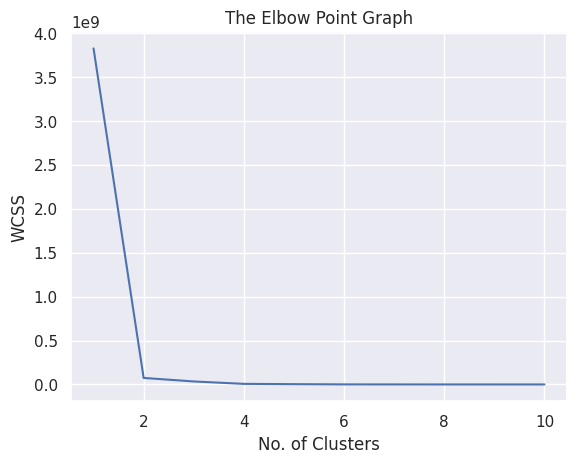

In [ ]:
sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0)
y = kmeans.fit_predict(x)
print(y)

[0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


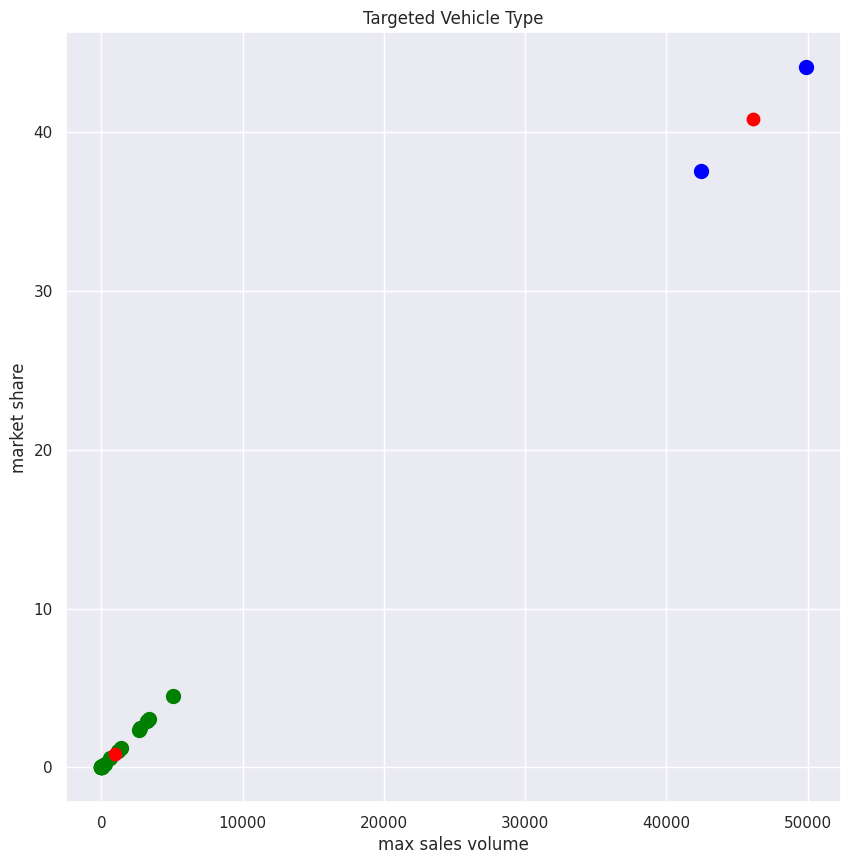

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(x[y==0,0], x[y==0,1], s=100, c='green', label='Cluster 1')
plt.scatter(x[y==1,0], x[y==1,1], s=100, c='blue', label='Cluster 2')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=80, c='red', label='centroids')

plt.title('Targeted Vehicle Type')
plt.xlabel('max sales volume')
plt.ylabel('market share')
plt.show()

In [ ]:
m = df1.iloc[:,[5,6]].values
print(m)

[[   136 223175]
 [    11 151491]
 [   317 202130]
 [   108  65431]
 [   108  65431]
 [    27 213936]
 [   212 213396]
 [    22 121463]
 [    55 247628]
 [   317 202130]
 [   212 213396]
 [    27 213936]
 [   597 376221]
 [   317 202130]
 [   136 223175]
 [   136 223175]
 [   136 223175]
 [   212 213396]
 [    25 104889]
 [    22 121463]
 [   597 376221]
 [   136 223175]
 [     4 104989]
 [   317 202130]]


In [ ]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=25)
    kmeans.fit(m)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

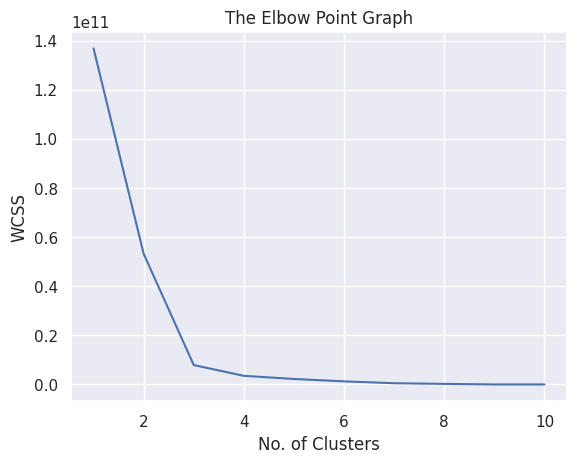

In [ ]:
sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0)
n = kmeans.fit_predict(m)
print(n)

[1 2 1 2 2 1 1 2 1 1 1 1 0 1 1 1 1 1 2 2 0 1 2 1]


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


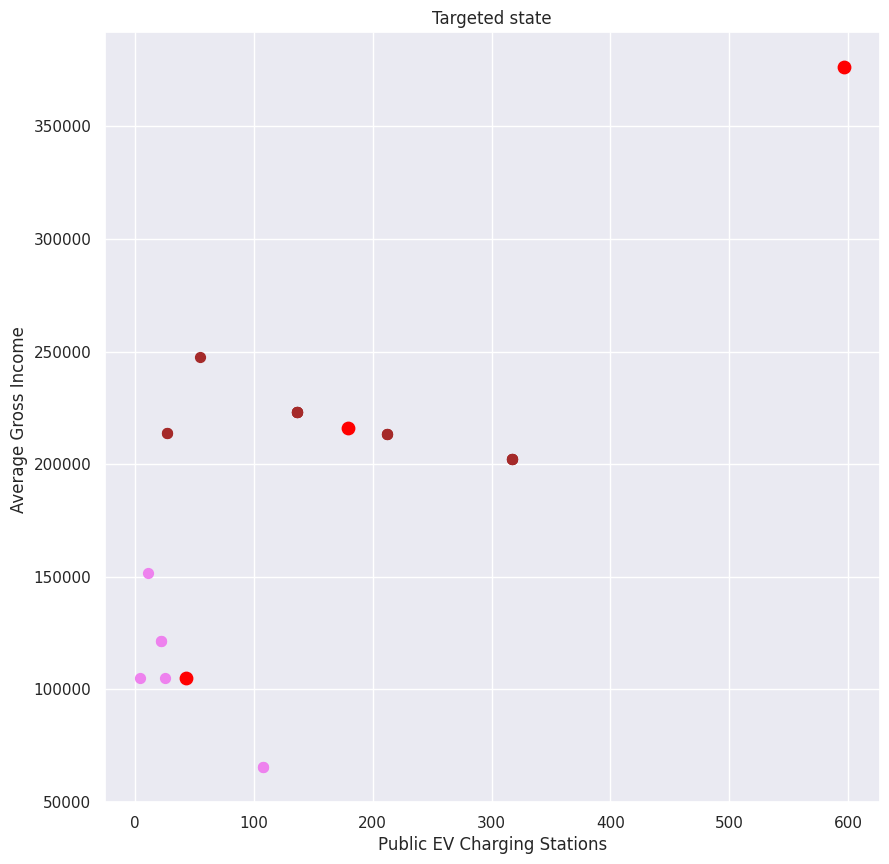

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(m[n==0,0], m[n==0,1], s=50, c='orange', label='Cluster 1')
plt.scatter(m[n==1,0], m[n==1,1], s=50, c='brown', label='Cluster 2')
plt.scatter(m[n==2,0], m[n==2,1], s=50, c='violet', label='Cluster 3')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=80, c='red', label='centroids')

plt.title('Targeted state')
plt.xlabel('Public EV Charging Stations')
plt.ylabel('Average Gross Income ')
plt.show()

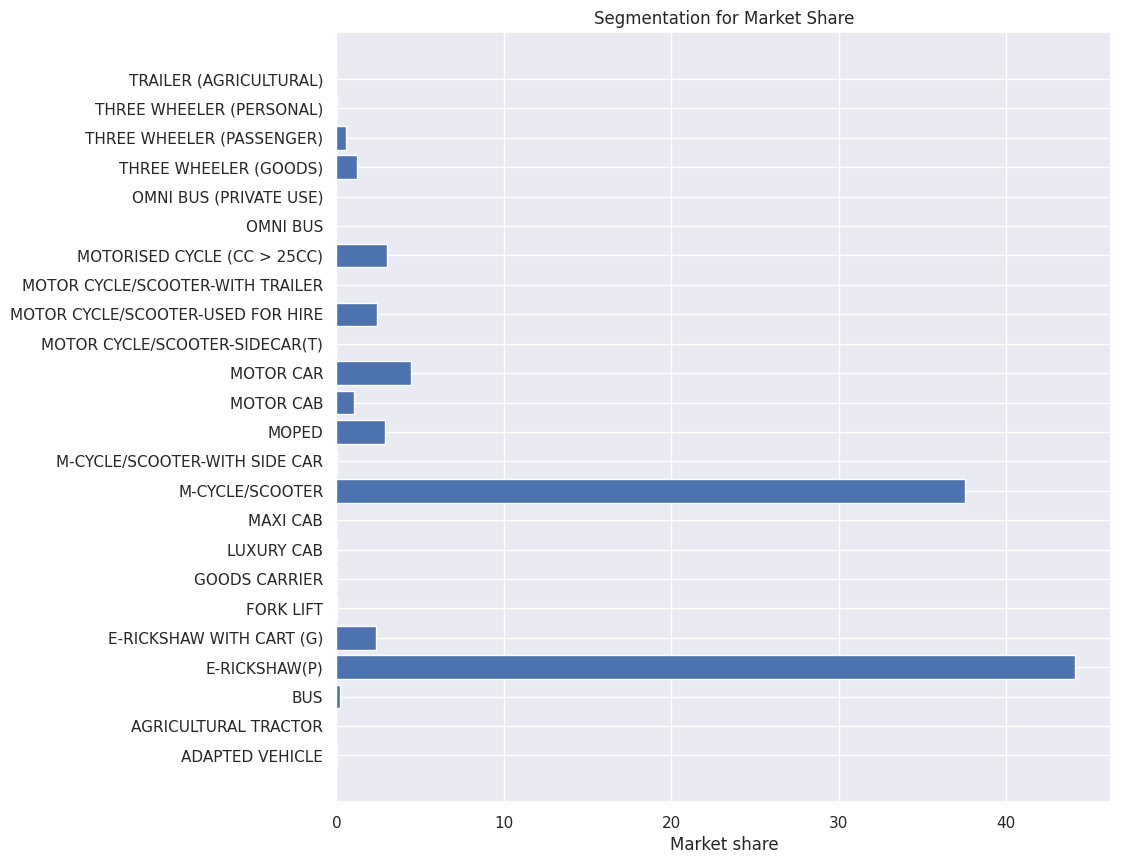

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
ax.barh(y= df1['type'],width=df1['market share'])
ax.set_title("Segmentation for Market Share")
ax.set_xlabel("Market share");

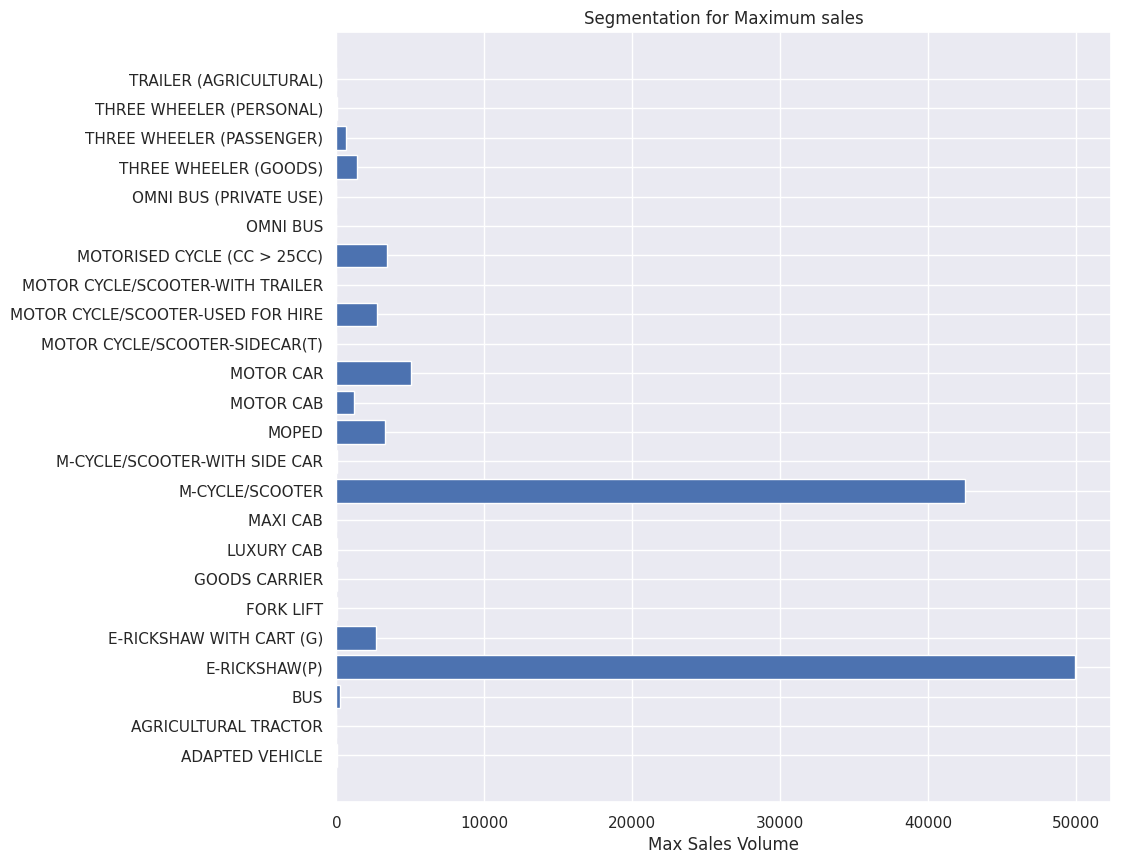

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
ax.barh(y= df1['type'],width=df1['max sales volume'])
ax.set_title("Segmentation for Maximum sales")
ax.set_xlabel("Max Sales Volume");

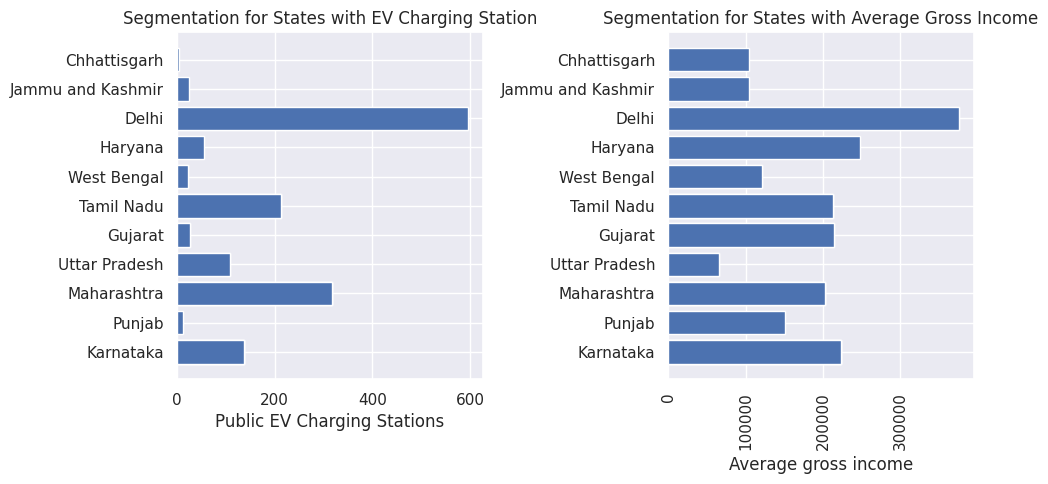

In [ ]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2,figsize=(10,5))
ax1.barh(y= df1['state'],width=df1['Public EV Charging Stations'])
ax1.set_title("Segmentation for States with EV Charging Station")
ax1.set_xlabel("Public EV Charging Stations")
ax2.barh(y= df1['state'],width=df1['Average gross income'])
for tick in ax2.get_xticklabels():
    tick.set_rotation(90)
ax2.set_title("Segmentation for States with Average Gross Income")
ax2.set_xlabel("Average gross income")
fig.tight_layout();

In [ ]:
for label, content in df1.items():
    if not pd.api.types.is_numeric_dtype(df1[label]):
        lst = df1[label].unique()
        label_map = {}
        for i in range(len(lst)):
            label_map[lst[i]] = i
        df1[label] = df1[label].map(label_map)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   sno                          24 non-null     int64  
 1   type                         24 non-null     int64  
 2   max sales volume             24 non-null     int64  
 3   market share                 24 non-null     float64
 4   state                        24 non-null     int64  
 5   Public EV Charging Stations  24 non-null     int64  
 6   Average gross income         24 non-null     int64  
dtypes: float64(1), int64(6)
memory usage: 1.4 KB


<AxesSubplot: >

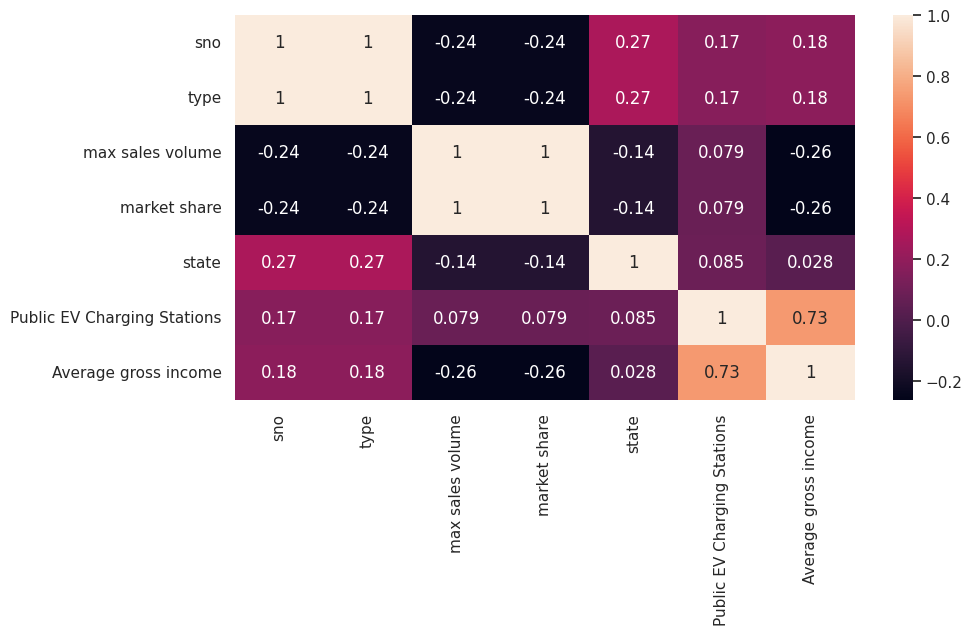

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(df1.corr(), annot=True)

In [ ]:
df1.drop("max sales volume", axis=1, inplace=True)
df1.head()

,sno,type,market share,state,Public EV Charging Stations,Average gross income
0,1,0,0.004419,0,136,223175
1,2,1,0.000884,1,11,151491
2,3,2,0.205941,2,317,202130
3,4,3,44.091781,3,108,65431
4,5,4,2.349323,3,108,65431


In [ ]:
df1.drop("sno", axis=1, inplace=True)
df1.head()

,type,market share,state,Public EV Charging Stations,Average gross income
0,0,0.004419,0,136,223175
1,1,0.000884,1,11,151491
2,2,0.205941,2,317,202130
3,3,44.091781,3,108,65431
4,4,2.349323,3,108,65431


In [ ]:
df1.to_csv("data_modified.csv", index=False)

In [ ]:
data_modified=pd.read_csv("data_modified.csv")
data_modified.head()

,type,market share,state,Public EV Charging Stations,Average gross income
0,0,0.004419,0,136,223175
1,1,0.000884,1,11,151491
2,2,0.205941,2,317,202130
3,3,44.091781,3,108,65431
4,4,2.349323,3,108,65431


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

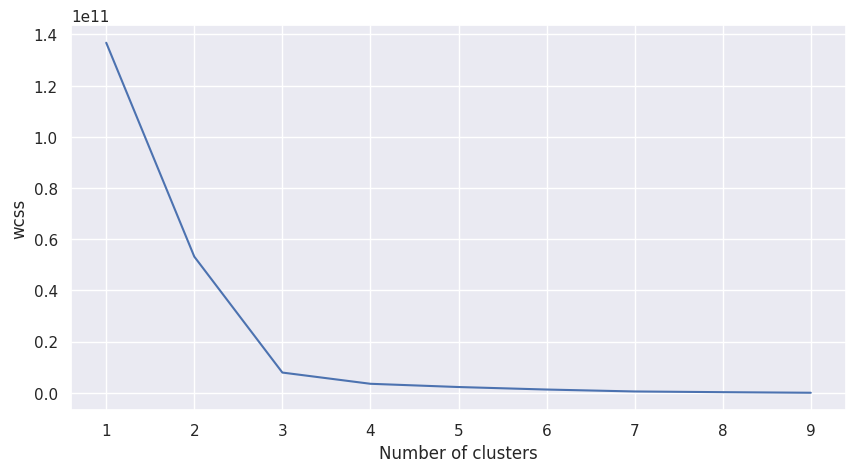

In [ ]:
wcss = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data_modified)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 10), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [ ]:
kmeans = KMeans(3, init = 'k-means++', random_state=42).fit(data_modified)
data_modified['cluster_number'] = kmeans.labels_

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
data_modified

,type,market share,state,Public EV Charging Stations,Average gross income,cluster_number
0,0,0.004419,0,136,223175,0
1,1,0.000884,1,11,151491,1
2,2,0.205941,2,317,202130,0
3,3,44.091781,3,108,65431,1
4,4,2.349323,3,108,65431,1
5,5,0.026516,4,27,213936,0
6,6,0.054800,5,212,213396,0
7,7,0.009723,6,22,121463,1
8,8,0.000884,7,55,247628,0
9,9,37.529941,2,317,202130,0


In [ ]:
cross_state = pd.crosstab(data_modified['cluster_number'], data_modified['state'])
cross_state

state,0,1,2,3,4,5,6,7,8,9,10
cluster_number,,,,,,,,,,,
0,5,0,4,0,2,3,0,1,0,0,0
1,0,1,0,2,0,0,2,0,0,1,1
2,0,0,0,0,0,0,0,0,2,0,0


In [ ]:
plt.rcParams["figure.figsize"] = [200, 50]
plt.rcParams['font.size'] = 100
mosaic(cross_state.stack())
plt.show();

In [ ]:
cross_vehicleType = pd.crosstab(data_modified['cluster_number'], data_modified['type'])
cross_vehicleType

type,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
cluster_number,,,,,,,,,,,,,,,,,,,,,
0,1,0,1,0,0,1,1,0,1,1,...,1,1,1,1,0,0,0,1,0,1
1,0,1,0,1,1,0,0,1,0,0,...,0,0,0,0,1,1,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
plt.rcParams["figure.figsize"] = [200, 50]
plt.rcParams['font.size'] = 100
mosaic(cross_vehicleType.stack(), horizontal=False)
plt.show();

In [ ]:
df1

,market share,Public EV Charging Stations,Average gross income
3,44.091781,108,65431
9,37.529941,317,202130
13,4.459117,317,202130


In [ ]:
df1

,sno,type,max sales volume,market share,state,Public EV Charging Stations,Average gross income
0,1,ADAPTED VEHICLE,5,0.004419,Karnataka,136,223175
1,2,AGRICULTURAL TRACTOR,1,0.000884,Punjab,11,151491
2,3,BUS,233,0.205941,Maharashtra,317,202130
3,4,E-RICKSHAW(P),49885,44.091781,Uttar Pradesh,108,65431
4,5,E-RICKSHAW WITH CART (G),2658,2.349323,Uttar Pradesh,108,65431
5,6,FORK LIFT,30,0.026516,Gujarat,27,213936
6,7,GOODS CARRIER,62,0.054800,Tamil Nadu,212,213396
7,8,LUXURY CAB,11,0.009723,West Bengal,22,121463
8,9,MAXI CAB,1,0.000884,Haryana,55,247628
9,10,M-CYCLE/SCOOTER,42461,37.529941,Maharashtra,317,202130


In [ ]:
df1.drop('state',axis=1,inplace=True)
df1 = df1.iloc[[3,9,13]]
df1

,sno,type,max sales volume,market share,Public EV Charging Stations,Average gross income
3,4,E-RICKSHAW(P),49885,44.091781,108,65431
9,10,M-CYCLE/SCOOTER,42461,37.529941,317,202130
13,14,MOTOR CAR,5045,4.459117,317,202130


In [ ]:
df1.drop('type',axis=1,inplace=True)

<ipython-input-105-13c386fc2a2c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop('type',axis=1,inplace=True)


In [ ]:
df1.drop('sno',axis=1,inplace=True)

<ipython-input-106-fb3f56caf284>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop('sno',axis=1,inplace=True)


In [ ]:
df_min_max_scaled = df1.copy()

# matrix normalization
for column in df_min_max_scaled.columns:
    df_min_max_scaled[column] = df_min_max_scaled[column] /df_min_max_scaled[column].max()

df_min_max_scaled

,max sales volume,market share,Public EV Charging Stations,Average gross income
3,1.000000,1.000000,0.340694,0.323708
9,0.851178,0.851178,1.000000,1.000000
13,0.101133,0.101133,1.000000,1.000000


In [ ]:
dfx = df_min_max_scaled.mul(10)
dfy = dfx
dfx

,max sales volume,market share,Public EV Charging Stations,Average gross income
3,10.000000,10.000000,3.40694,3.237075
9,8.511777,8.511777,10.00000,10.000000
13,1.011326,1.011326,10.00000,10.000000


In [ ]:
dfx = dfx.multiply([0.2,1,0.5,0.3],axis=1)
dfy = dfy.multiply([0.32,1,0.4,0.25],axis=1)
dfx

,max sales volume,market share,Public EV Charging Stations,Average gross income
3,2.000000,10.000000,1.70347,0.971123
9,1.702355,8.511777,5.00000,3.000000
13,0.202265,1.011326,5.00000,3.000000


In [ ]:
dfx = dfx.drop('market share',axis=1)
dfy = dfy.drop('market share',axis=1)

In [ ]:
dfx = dfx.sum(axis = 1)
dfy = dfy.sum(axis = 1)
dfx

3     4.674593
9     9.702355
13    8.202265
dtype: float64

In [ ]:
x = dfx.values.tolist()
y = dfy.values.tolist()
s = df1['market share'].values.tolist()
c = ['blue', 'red', 'green']
s = [a*100 for a in s]

In [ ]:
df2 = pd.read_csv('/content/ev_sales_data.csv')

In [ ]:
#Data on Maharashtra population and min annual income pulled from the internet
population = 124862220
income_mean = df2.iloc[9, 5]
income_min = 51111
#we can determine the max income by knowing the min income, mean income, population
income_max = (2*income_mean-51111)
income_MH = np.linspace(income_min, income_max, population)

In [ ]:
income_other = df2['Average gross income']
income_other.drop([9], axis=0, inplace= True)
income = [income_MH, income_other]

In [ ]:
ev_cities = 55
stations_total = df2.iloc[9, 4]
stations_MH = [10*np.ones(10), 7*np.ones(20), 5*np.ones(13), np.ones(12)]

In [ ]:
S = [10*np.ones(10), 7*np.ones(20), 5*np.ones(13), np.ones(12)]
stations_MH = []
for i in range(len(S)):
    for j in range(len(S[i])):
        stations_MH.append(S[i][j])
stations_MH = np.array(stations_MH)

In [ ]:
stations_other = df2['Public EV Charging Stations']
stations_other.drop([9], axis=0, inplace= True)
stations = [np.log(stations_MH), np.log(stations_other)]

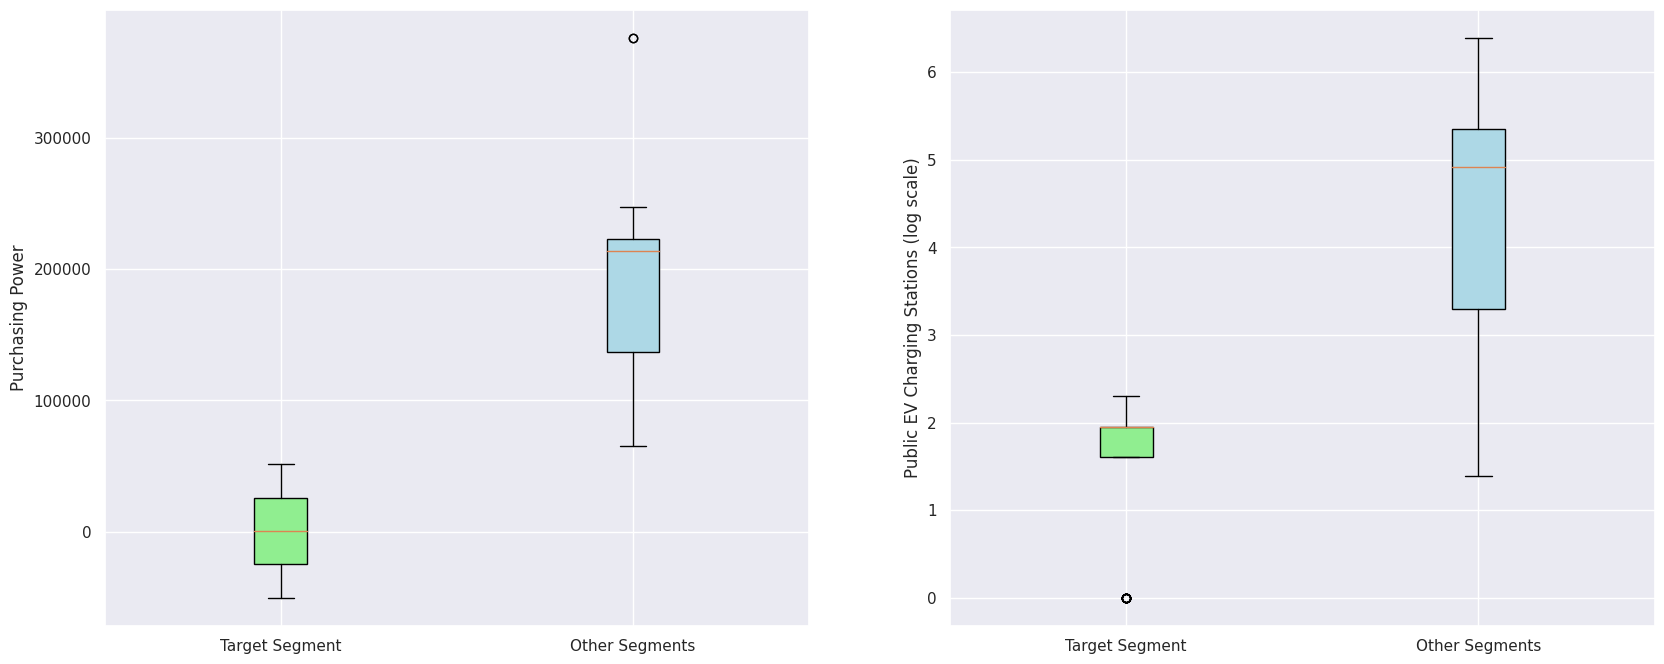

In [ ]:
# Creating boxplot
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
labels = ['Target Segment', 'Other Segments']
bplot1 = ax1.boxplot(income, patch_artist=True, labels = labels)
bplot2 = ax2.boxplot(stations, patch_artist=True, labels = labels)
colors = ['lightgreen', 'lightblue']
for bplot in (bplot1, bplot2):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

for ax in (ax1, ax2):
    ax.yaxis.grid(True)
    ax.set_xticklabels(labels=labels)
ax1.set_ylabel('Purchasing Power')
ax2.set_ylabel('Public EV Charging Stations (log scale)')
# show plot
plt.show()